In [19]:
import random as rd
import numpy as np
import seaborn as sns
import pandas as pd

In [20]:
mu1 = -1
mu2 = 3
sig1 = 0.5
sig2 = 1
N = 100
np.random.seed(10)
x11=np.random.randn(N,1)*sig1 + mu1
x12=np.random.randn(N,1)*sig1 + mu1+3
x21=np.random.randn(N,1)*sig2 + mu2
x22=np.random.randn(N,1)*sig2 + mu2+3
c = np.vstack((-np.ones((N,1)), np.ones((N,1))))
x1 = np.hstack((x11,x12))
x2 = np.hstack((x21,x22))

X = np.hstack( (np.vstack( (x1,x2) ),c) )
np.random.shuffle(X)
dataset = pd.DataFrame(data=X, columns=['x','y','c'])

In [21]:
dataset.head()

,x,y,c
0,-0.334207,2.058738,-1.0
1,3.264395,5.636814,1.0
2,-0.669884,1.856185,-1.0
3,1.995284,4.484924,1.0
4,3.588041,4.739172,1.0


In [23]:
dataset['cluster'] = dataset['c'].replace({1:"cluster A", -1: "cluster B"})

In [24]:
dataset.cluster.value_counts()

cluster A    100
cluster B    100
Name: cluster, dtype: int64

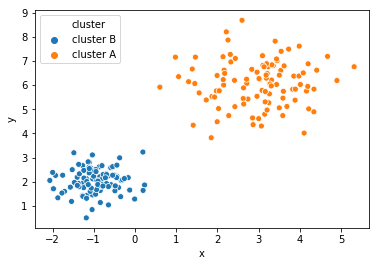

In [25]:
sns.scatterplot('x', 'y', hue='cluster', data=dataset)

Pseudo Code

Select k points

In [32]:
X = dataset[["x", "y"]]
y = dataset["c"]

In [268]:
class Perceptron:
    def __init__(self, iters=100, lambda_=0.1, tolerance=10e-5):
        self.iters = iters
        self.tolerance = tolerance
        self.lambda_ = lambda_ # Regularization parameter to reduce weight values
    
    def __compute_grad(self, idx):
        self.grad = -1*self.X.T@(idx*self.y)
        return self.grad
        
    def __update_weights(self, grad):
        self.w = self.w - self.lambda_*grad
        return self.w
        
    def fit(self, X, y):
        self.X = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X.values))
        self.y = y.values.reshape(-1,1)
        # Intialize weights, w as (num_of_features X 1)
        self.w = np.zeros((self.X.shape[-1], 1))
        for i in range(self.iters):
            # Compute predictions
            self.y_hat = np.sign(self.X @ self.w)
            #Find the set of miscalssified indices
            idx = (self.y != self.y_hat)
            grad = self.__compute_grad(idx)
            old_w = self.w.copy()
            new_w = self.__update_weights(grad)
            if np.sum(np.abs(old_w - new_w)) <= self.tolerance:
                break
                
    def predict(self, X):
        X_biased = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X.values))
        return np.sign(X_biased @ self.w)
    
    def weights(self):
        return self.w
            

In [269]:
pcp = Perceptron()

In [270]:
pcp.fit(X, y)

In [271]:
predictions = pcp.predict(X)

In [272]:
pcp.weights()

array([[-17.5       ],
       [ 48.40260151],
       [  2.50916963]])

In [273]:
accuracy = np.sum(y == predictions.flatten())/len(y)
accuracy

1.0